<a href="https://colab.research.google.com/github/souramay/Darksoul/blob/main/Email_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
spambase = fetch_ucirepo(id=94)

# data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# metadata
print(spambase.metadata)

# variable information
print(spambase.variables)


{'uci_id': 94, 'name': 'Spambase', 'repository_url': 'https://archive.ics.uci.edu/dataset/94/spambase', 'data_url': 'https://archive.ics.uci.edu/static/public/94/data.csv', 'abstract': 'Classifying Email as Spam or Non-Spam', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 4601, 'num_features': 57, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1999, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C53G6X', 'creators': ['Mark Hopkins', 'Erik Reeber', 'George Forman', 'Jaap Suermondt'], 'intro_paper': None, 'additional_info': {'summary': 'The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...\n\nThe classification task for this dataset is to determine whether a given email is spam or not.\n\t\nOur collecti

Model without regularization:
Accuracy: 90.55%
Confusion Matrix:
[[502  29]
 [ 58 332]]
Classification Report:
Precision: 0.92
Recall: 0.85
F1-Score: 0.88


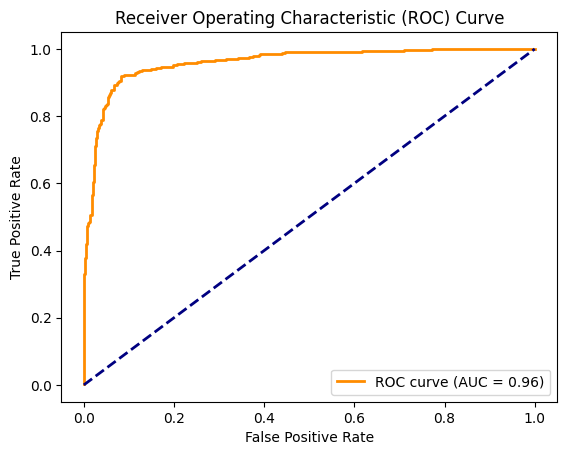


Model with L2 regularization:
Accuracy: 90.55%
Confusion Matrix:
[[502  29]
 [ 58 332]]
Classification Report:
Precision: 0.92
Recall: 0.85
F1-Score: 0.88


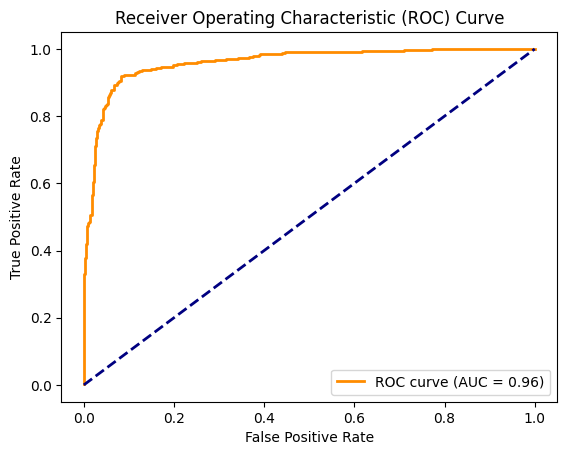

In [ ]:
# Install the ucimlrepo library if not already installed
!pip install ucimlrepo

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Fetch the Spambase dataset from UCI Machine Learning Repository
from ucimlrepo import fetch_ucirepo

# Fetch dataset
spambase = fetch_ucirepo(id=94)

# Data (as pandas dataframes)
X = spambase.data.features
y = spambase.data.targets

# Convert target to a 1D array
y = y.values.ravel()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a bias term (intercept) to the features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization=None, lambda_=0.1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization = regularization  # None, 'l1', 'l2', or 'elasticnet'
        self.lambda_ = lambda_
        self.weights = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        m = len(y)
        loss = (-1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        if self.regularization == 'l1':
            loss += (self.lambda_ / (2 * m)) * np.sum(np.abs(self.weights))
        elif self.regularization == 'l2':
            loss += (self.lambda_ / (2 * m)) * np.sum(self.weights**2)
        elif self.regularization == 'elasticnet':
            loss += (self.lambda_ / (2 * m)) * (0.5 * np.sum(self.weights**2) + 0.5 * np.sum(np.abs(self.weights)))
        return loss

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights)
            y_pred = self.sigmoid(z)
            gradient = np.dot(X.T, (y_pred - y)) / m

            if self.regularization == 'l1':
                gradient += (self.lambda_ / m) * np.sign(self.weights)
            elif self.regularization == 'l2':
                gradient += (self.lambda_ / m) * self.weights
            elif self.regularization == 'elasticnet':
                gradient += (self.lambda_ / m) * (0.5 * self.weights + 0.5 * np.sign(self.weights))

            self.weights -= self.learning_rate * gradient

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights))

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    # Accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion Matrix
    def confusion_matrix(y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))
        return np.array([[tn, fp], [fn, tp]])

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    def classification_report(y_true, y_pred):
        tp = np.sum((y_true == 1) & (y_pred == 1))
        fp = np.sum((y_true == 0) & (y_pred == 1))
        fn = np.sum((y_true == 1) & (y_pred == 0))
        tn = np.sum((y_true == 0) & (y_pred == 0))

        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

        print("Classification Report:")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-Score: {f1_score:.2f}")

    classification_report(y_test, y_pred)

    # ROC Curve and AUC
    def roc_curve(y_true, y_pred_proba):
        thresholds = np.sort(y_pred_proba)[::-1]
        tpr = []
        fpr = []

        for threshold in thresholds:
            y_pred = (y_pred_proba >= threshold).astype(int)
            tp = np.sum((y_true == 1) & (y_pred == 1))
            fp = np.sum((y_true == 0) & (y_pred == 1))
            tn = np.sum((y_true == 0) & (y_pred == 0))
            fn = np.sum((y_true == 1) & (y_pred == 0))

            tpr.append(tp / (tp + fn) if (tp + fn) != 0 else 0)
            fpr.append(fp / (fp + tn) if (fp + tn) != 0 else 0)

        return fpr, tpr, thresholds

    def auc(fpr, tpr):
        # Calculate AUC using the trapezoidal rule
        area = 0
        for i in range(1, len(fpr)):
            area += (fpr[i] - fpr[i - 1]) * (tpr[i] + tpr[i - 1]) / 2
        return area

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Train and evaluate logistic regression without regularization
print("Model without regularization:")
model_no_reg = LogisticRegression(learning_rate=0.01, num_iterations=1000)
model_no_reg.fit(X_train, y_train)
evaluate_model(model_no_reg, X_test, y_test)

# Train and evaluate logistic regression with L2 regularization
print("\nModel with L2 regularization:")
model_l2_reg = LogisticRegression(learning_rate=0.01, num_iterations=1000, regularization='l2', lambda_=0.1)
model_l2_reg.fit(X_train, y_train)
evaluate_model(model_l2_reg, X_test, y_test)